In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Define a function named get\_lower\_and\_upper\_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.



In [2]:
def get_upper_outliers(s, k=1.5, bound=False):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    if bound:
        return upper_bound
    return s.apply(lambda x: max([x - upper_bound, 0]))

def get_lower_outliers(s, k=1.5, bound=False):
    '''
    Given a series and a cutoff value, k, returns the lower outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the lower bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    if bound:
        return lower_bound
    return s.apply(lambda x: min([x - lower_bound, 0]))

1. Using [lemonade.csv](https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv) dataset and focusing on continuous variables:
    
    

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
def clean(varStr): 
    """Converts a string into a valid python identifier"""
    import re
    return re.sub('\W|^(?=\d)','_', varStr).lower()
df.columns = [clean(col) for col in df]
df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
    

- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
    

In [5]:
for col in df.select_dtypes('number'):
    print(col, 'upper')
    display((df[get_upper_outliers(df[col]) > 0] ))
    
    print(col, 'lower')
    display(df[get_lower_outliers(df[col]).abs() > 0])

temperature upper


,date,day,temperature,rainfall,flyers,price,sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


temperature lower


,date,day,temperature,rainfall,flyers,price,sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


rainfall upper


,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


rainfall lower


,date,day,temperature,rainfall,flyers,price,sales


flyers upper


,date,day,temperature,rainfall,flyers,price,sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


flyers lower


,date,day,temperature,rainfall,flyers,price,sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


price upper


,date,day,temperature,rainfall,flyers,price,sales


price lower


,date,day,temperature,rainfall,flyers,price,sales


sales upper


,date,day,temperature,rainfall,flyers,price,sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


sales lower


,date,day,temperature,rainfall,flyers,price,sales


> **temperature** The upper outlier looks like bad data, but the lower outlier looks fine  
> **rainfall** The upper outliers look fine  
> **flyers** It's hard to imagine a negative number of flyers being posted  
> **sales** I doubt 534 is an accurate number

- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?
    
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper\_bound in each colum of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?


In [6]:
for col in df.select_dtypes('number'):
    print(col, 'upper')
    display((df[get_upper_outliers(df[col], k=3) > 0] ))
    
    print(col, 'lower')
    display(df[get_lower_outliers(df[col], k=3).abs() > 0])

temperature upper


,date,day,temperature,rainfall,flyers,price,sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


temperature lower


,date,day,temperature,rainfall,flyers,price,sales


rainfall upper


,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


rainfall lower


,date,day,temperature,rainfall,flyers,price,sales


flyers upper


,date,day,temperature,rainfall,flyers,price,sales


flyers lower


,date,day,temperature,rainfall,flyers,price,sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


price upper


,date,day,temperature,rainfall,flyers,price,sales


price lower


,date,day,temperature,rainfall,flyers,price,sales


sales upper


,date,day,temperature,rainfall,flyers,price,sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


sales lower


,date,day,temperature,rainfall,flyers,price,sales


> **temperature** The upper outlier looks like bad data, but the lower outlier looks fine  
> **rainfall** The upper outliers look fine  
> **flyers** It's hard to imagine a negative number of flyers being posted  
> **sales** I doubt 534 is an accurate number

2. Identify if any columns in `lemonade.csv` are normally distributed. 



For normally distributed columns:  
- Use a 2 sigma decision rule to isolate the outliers.
    
    - Do these make sense?
    - Should certain outliers be kept or removed?


In [7]:
def shapiro_gausian_test(s, alpha=0.05):
    from scipy.stats import shapiro

    stat, p = stat, p = shapiro(s)
    result={'reject': p < alpha,
        'h0' : f"The distribution is gaussian",
        'stat_name': 'statistic',
        'stat': stat,
        'p_value': p,
        'alpha': alpha
    }
    return result

In [8]:
for col in df.select_dtypes('number'):
    print(col, shapiro_gausian_test(df[col])['reject'])

temperature True
rainfall True
flyers True
price False
sales True


c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


<AxesSubplot:>

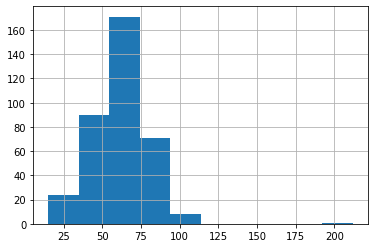

In [9]:
df['temperature'].hist()

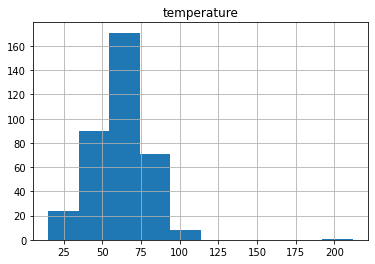

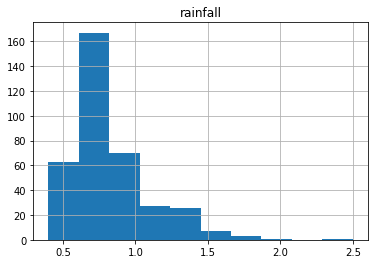

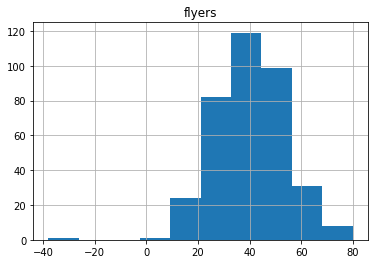

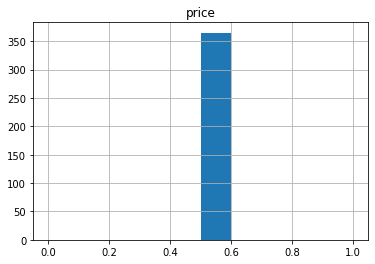

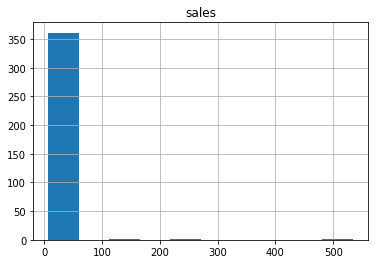

In [10]:
for col in df.select_dtypes('number'):
    df[col].hist()
    plt.title(col)
    plt.show()

For normally distributed columns:  
- Use a 2 sigma decision rule to isolate the outliers.
    
    - Do these make sense?
    - Should certain outliers be kept or removed?


In [11]:
for col in df.select_dtypes('number'):
    z = (df[col] - df[col].mean()) / df[col].std()
    df[f'{col}_z'] = z

df = df.drop(columns=['price_z'])

df.head()

,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,-0.318783


In [14]:
for col in [col for col in df if col.endswith('_z')]:
    print(col, 2)
    display(df[df[col].abs() > 2].sort_values(by=col))

temperature_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,0.392083
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,0.456708
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,0.456708
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847


rainfall_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
359,12/26/17,Tuesday,28.9,1.43,23,0.5,13,-1.787286,2.205363,-1.240647,-0.480344
351,12/18/17,Monday,30.9,1.43,27,0.5,13,-1.676702,2.205363,-0.950507,-0.480344
346,12/13/17,Wednesday,32.2,1.43,26,0.5,14,-1.604823,2.205363,-1.023042,-0.448032
342,12/9/17,Saturday,31.2,1.43,19,0.5,14,-1.660115,2.205363,-1.530787,-0.448032
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.604823,2.205363,-1.023042,-0.448032
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.637998,2.205363,-1.458252,-0.512656
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,-1.676702,2.205363,-1.313182,-0.480344
347,12/14/17,Thursday,31.9,1.54,24,0.5,13,-1.621411,2.606983,-1.168112,-0.480344
337,12/4/17,Monday,34.9,1.54,16,0.5,13,-1.455535,2.606983,-1.748392,-0.480344
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.803873,2.606983,-1.458252,-0.512656


flyers_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964,0.230523
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499,0.295147
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569,0.295147
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709,0.424395


sales_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275


3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

In [15]:
for col in [col for col in df if col.endswith('_z')]:
    print(col, 2)
    display(df[df[col].abs() > 3].sort_values(by=col))

temperature_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847


rainfall_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,-0.544968
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


flyers_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159


sales_z 2


,date,day,temperature,rainfall,flyers,price,sales,temperature_z,rainfall_z,flyers_z,sales_z
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275
